In [1]:
# Clean the data for the Healthcare Associated Infections-State dataset 
# and create a summary statistic based on the SIR averages of each state.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
#Read in the Healthcare Associated Infections data csv file
infections = pd.read_csv("../project-1_Group-5/Resources/Healthcare_Associated_Infections-State.csv")
infections.head()

,State,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,AK,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,0.178,NaN,10/01/2021,09/30/2022
1,AK,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,0.590,NaN,10/01/2021,09/30/2022
2,AK,HAI_1_SIR,Central Line Associated Bloodstream Infection ...,0.339,NaN,10/01/2021,09/30/2022
3,AK,HAI_2_CILOWER,Catheter Associated Urinary Tract Infections (...,0.507,NaN,10/01/2021,09/30/2022
4,AK,HAI_2_CIUPPER,Catheter Associated Urinary Tract Infections (...,1.152,NaN,10/01/2021,09/30/2022


In [3]:
# Create a new dataframe that has the SIR average for each state. 
# This summary will include the average of HAI_1_SIR, HAI_2_SIR, HAI_3_sir, HAI_4_SIR, HAI_5_SIR, HAI_6_SIR

infections_df = pd.DataFrame(infections)
infections_df.head()

sirs = ['HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']

filtered_infections = infections.loc[infections['Measure ID'].isin(sirs)]
filtered_infections.head()


,State,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
2,AK,HAI_1_SIR,Central Line Associated Bloodstream Infection ...,0.339,NaN,10/01/2021,09/30/2022
5,AK,HAI_2_SIR,Catheter Associated Urinary Tract Infections (...,0.780,NaN,10/01/2021,09/30/2022
8,AK,HAI_3_SIR,SSI - Colon Surgery,1.129,NaN,10/01/2021,09/30/2022
11,AK,HAI_4_SIR,SSI - Abdominal Hysterectomy,2.009,NaN,10/01/2021,09/30/2022
14,AK,HAI_5_SIR,MRSA Bacteremia,0.918,NaN,10/01/2021,09/30/2022


In [4]:
# Select the columns that we want to keep in the new dataframe
filtered_infections = filtered_infections[['State', 'Measure ID', 'Score', 'Start Date', 'End Date']].reset_index(drop=True)   
filtered_infections.head()


,State,Measure ID,Score,Start Date,End Date
0,AK,HAI_1_SIR,0.339,10/01/2021,09/30/2022
1,AK,HAI_2_SIR,0.780,10/01/2021,09/30/2022
2,AK,HAI_3_SIR,1.129,10/01/2021,09/30/2022
3,AK,HAI_4_SIR,2.009,10/01/2021,09/30/2022
4,AK,HAI_5_SIR,0.918,10/01/2021,09/30/2022


In [5]:
# Check to see if there are any NaN or null values in the Score column
print(filtered_infections.isna().sum())

# Filter out any rows where Score values are non-numeric


filtered_infections['Score'] = pd.to_numeric(filtered_infections['Score'], errors='coerce') #.notna()]

#infections_converted.dtypes

filtered_infections.head()

# Convert the Score column to a numeric value in a new dataframe
# Was running into an error so this is to force the score column to be numeric

# infections_converted['Score'] = infections_converted['Score'].astype(float)



State         0
Measure ID    0
Score         0
Start Date    0
End Date      0
dtype: int64


,State,Measure ID,Score,Start Date,End Date
0,AK,HAI_1_SIR,0.339,10/01/2021,09/30/2022
1,AK,HAI_2_SIR,0.780,10/01/2021,09/30/2022
2,AK,HAI_3_SIR,1.129,10/01/2021,09/30/2022
3,AK,HAI_4_SIR,2.009,10/01/2021,09/30/2022
4,AK,HAI_5_SIR,0.918,10/01/2021,09/30/2022


In [6]:
# Recheck types to make sure the Score column is now a float
# infections_converted.dtypes

In [7]:
# Calculate the mean scores for each state
infections_mean = filtered_infections.groupby('State')['Score'].mean().reset_index()
infections_mean.head()

# Rename the Score column to SIR Average
infections_mean = infections_mean.rename(columns={'Score': 'SIR Average'})
infections_mean.head(50)

,State,SIR Average
0,AK,0.901000
1,AL,0.907000
2,AR,0.799333
3,AS,NaN
4,AZ,0.729500
5,CA,0.804667
6,CO,0.802500
7,CT,0.681167
8,DC,0.957000
9,DE,0.716000


In [8]:
# This SIR value for each state represents the Standard Infection Ratio (SIR) Average for each state.
# Sort the list by SIR Average
infections_mean = infections_mean.sort_values(by='SIR Average', ascending=False).set_index('State')
infections_mean

,SIR Average
State,
PR,1.073200
WV,1.045333
NM,1.011833
VT,0.997167
MS,0.992167
ID,0.971833
MI,0.965000
DC,0.957000
MD,0.944833


<Axes: >

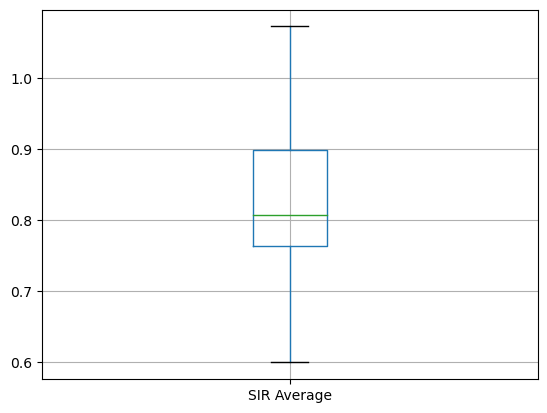

In [9]:
#Create a boxplot to find outliers
infections_mean.boxplot(column='SIR Average')

In [10]:
#Output the infections mean dataframe to a csv file
infections_mean.to_csv("../project-1_Group-5/Outputs/Healthcare_Associated_Infections-State-clean.csv")